In [209]:
import seaborn as sns
import pandas as pd

In [208]:
df = pd.read_csv("http://www.bodowinter.com/tutorial/politeness_data.csv")
df.head()

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
1,F1,F,1,inf,204.5
2,F1,F,2,pol,285.1
3,F1,F,2,inf,259.7
4,F1,F,3,pol,203.9


<Axes: xlabel='scenario', ylabel='frequency'>

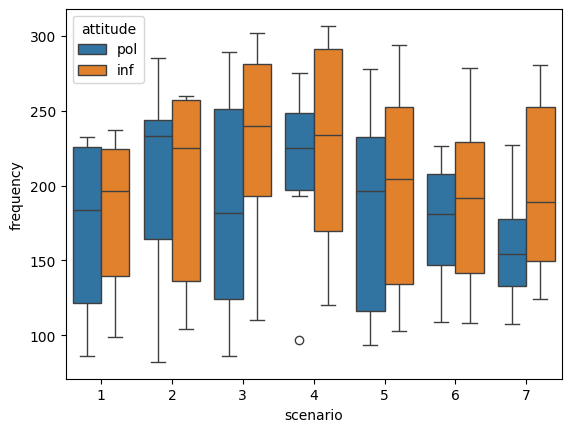

In [214]:
sns.boxplot(data=df, x='scenario', y='frequency', hue='attitude')

### Задание 2

In [222]:
import seaborn.objects as so

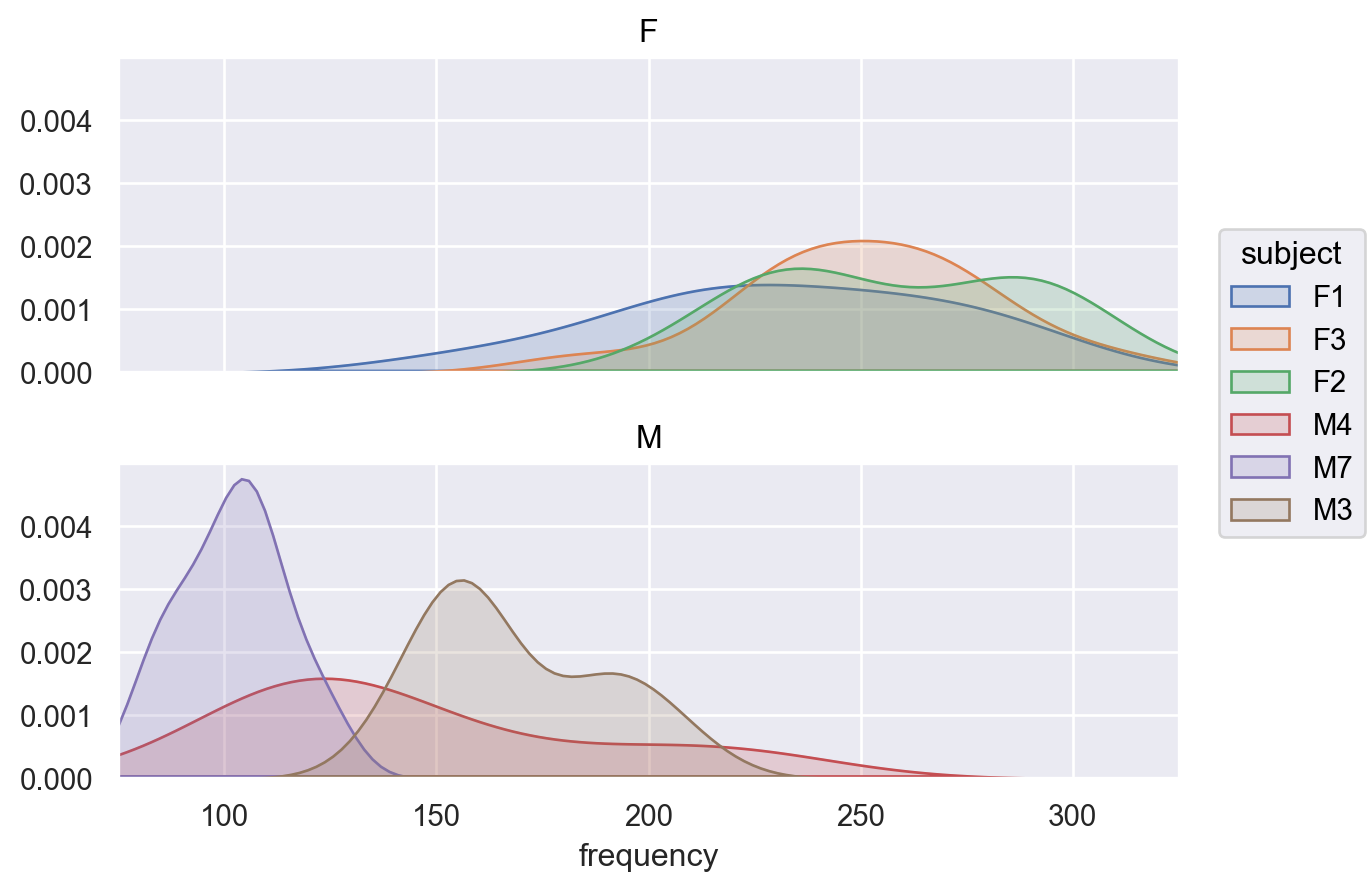

In [253]:
p = so.Plot(data=df, x='frequency')
p.facet(None, 'gender').add(so.Area(), so.KDE(), color='subject').limit(x=(75, 325))

### Задание 3

In [257]:
import statsmodels.api as sm

In [259]:
df.head()

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
1,F1,F,1,inf,204.5
2,F1,F,2,pol,285.1
3,F1,F,2,inf,259.7
4,F1,F,3,pol,203.9


-----------

In [323]:
def fix_estimator(X, estimator):
    n = len(X)
    
    theta_hat = estimator(X)
    theta_i = [estimator(np.hstack([X[:i], X[i+1:]])) for i in range(n)]
    theta_overline = sum(theta_i) / n
    
    bias = (theta_hat - theta_overline)*(n-1)
    
    return bias, lambda x: estimator(x) + bias

In [301]:
X = np.random.normal(loc=10, scale=2, size=100)

In [324]:
bias, estim = fix_estimator(X, np.std)

In [330]:
np.std(X, ddof=1), estim(X)

(1.977060755316698, 1.9806875105349329)

# Конспект по лекции bootstrep 

Это метод оценки доверительных интервалов и проверки гипотез на любые нестандартные статистики. \
Раньше, с помощью t-теста, anova и других методов, мы могли оценить только средние. \
Но теперь, благодаря методу bootstrep мы можем оценить такие статистики как медианы, стандартные отклонения, коэффициенты при регрессии и т.д.

Пусть у нас есть репрезентативная достаточно большая выборка $X = [X_1, \dots, X_n]$ из генеральной совокупности.

Хотим оценть статистику $T(X)$.

Для этого сгенерируем множество выборок из нашей выборки $X$. Их количество будет $B$, а выборки будем генерировать с возвращением. \
Рекомендуемое количество выборок $B$ - более $1000$.

Обозначим эти выборки через $X^*$. Пример:

$X^*_1 = [X_{10}, X_1, X_2, X_2, \dots] \quad$  - элементы могут повторяться, как $X_2$,\
$X^*_2 = [ \dots ],$ \
$\dots$ \
$X^*_B = [ \dots ].$


Размер этих выборок может быть любой. Обычно выбирается размер исходной выборки $n$. \
Кстати, в каждую подвыборку попадает каждый раз $(1-\frac1e) \approx 63.6\%$ элементов оригинальной выборки.

Теперь, посчитаем для всех подвыборок статистику $T(X^*_i)$. Получаем множество статистик, и мы можем построить их распределение.

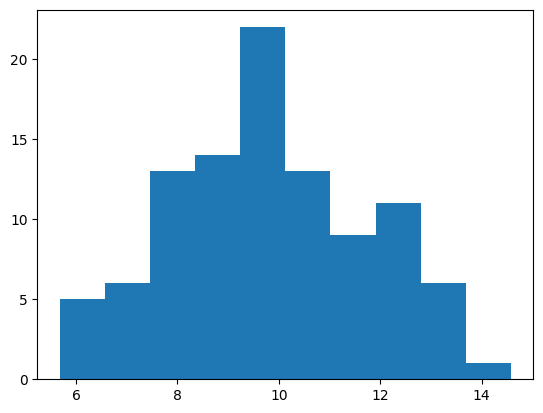

In [489]:
# Пример

plt.hist( T(X_star) );

Для этого распределения мы можем посчитать персентили. \
Например, для $90\%$ доверительного интервала, мы вычислим процентили уровня $0.05$ и $0.95$

Это называется **Percentile Bootstrep**.

In [363]:
# Пример

(np.percentile(T(X_star), 5), np.percentile(T(X_star), 95)) 

(6.595632646874603, 13.134693379270596)

### Теперь рассмотрим **Basic Bootstrep**. 

Допустим, мы пытаемся оценить статистику $\mathcal{T}$ из генеральной совокупности. \
Сначала, попробуем оценить доверительный интервал для разности $\mathcal{T} - T(X)$. 

Сделаем предположение, что эта разность имеет то же распределение, что и $T(X) - T(X^*)$, и обозначим это распределение как $\delta$:
$ \mathcal{T}-T(X) \sim T(X) - T(X^*) \qquad \sim \delta$

Тогда, если мы сможем оценить доверительный интервал для правой величины, то сможем оценить его и для $\mathcal{T}$. \
По определению доверительного интервала: \
$ \mathbb{P}\left(\mathcal{T}-T(X) \in [\delta_{0.05}, \delta_{0.95}]\right) = 0.9 $

Отсюда следует, что $90\%$ доверительный интервал для $\mathcal{T}$ будет равен: \
$ \mathbb{P}\left(\mathcal{T} \in [\delta_{0.05}+T(X), \delta_{0.95}+T(X)]\right) = 0.9 $,

т.е. мы просто перенесли $T(X)$ в правую сторону внутри вероятности $\mathbb{P}$. \
Здесь, через $\delta_{0.05}$ и $\delta_{0.95}$ обозначены процентили для распределения $\delta$.

Осталось вычислить эти процентили.

Мы можем вычислить их для $T(X^*)$ методом **Percentil Bootstrep**.

Осталось понять как меняются процентили при переходе от $T(X^*)$ на $T(X) - T(X^*)$. \
Это можно переписать как $-T(X^*) + T(X)$, где $T(X)$ - это просто константа.

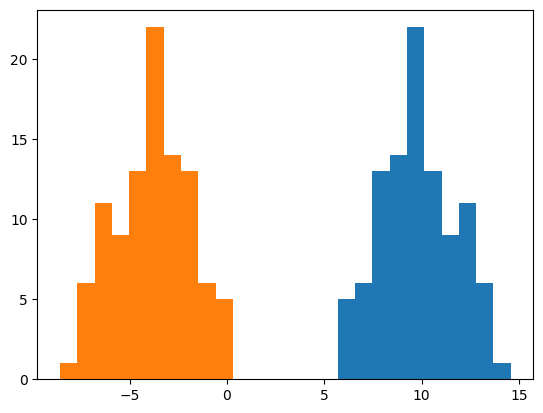

In [366]:
# Пример

plt.hist(T(X_star))
plt.hist(-T(X_star) + 6);

Эти графики могут немного дать интуицию о том, как связаны проентили $T(X^*)$(синий) и $T(X) - T(X^*)$(оранжевый).

Оказывается, процентили связаны слудеющим образом:

$ \delta_{0.05}(T(X) - T(X^*)) = -\delta_{0.95}(T(X^*)) + T(X) \quad $ - нижний процентиль искомого распределения, \
$ \delta_{0.95}(T(X) - T(X^*)) = -\delta_{0.05}(T(X^*)) + T(X) \quad $ - верхний процентиль искомого распределения.

А процентили $\delta_{0.95}(T(X^*))$ и $\delta_{0.05}(T(X^*))$ мы умеем считать методом **Percentil Bootstrep**.

Теперь, можем вычислить и процентили для $\mathcal{T}$. Для этого, к вычисленным процентилям просто добавляем $T(X)$.\
В итоге получаем,

$ \delta_{0.05}(\mathcal{T}) = -\delta_{0.95}(T(X^*)) + 2T(X) $, \
$ \delta_{0.95}(\mathcal{T}) = -\delta_{0.05}(T(X^*)) + 2T(X) $.

Это и есть $90\%$ доверительный интервал для статистики $\mathcal{T}$ из генеральной совокупности.

### Проверка гипотез с помощью Bootstrep

Пусть, есть две выборки из двух генеральных совокупностей.

$ X = X_1, \dots, X_n \quad | \mathcal{T}_X \quad | T(X) $ \
$ Y = Y_1, \dots, Y_m \quad\;\; | \mathcal{T}_Y \quad | T(Y) $

И соответственно $\mathcal{T}_X, \mathcal{T}_Y$ - статистики генеральных совокупностей, \
а $T(X), T(Y)$ - выборочные статистики.

Раньше мы предполагали в нулевой гипотезе равенство статистики генеральных совокупностей: \
$ H_0: \quad \mathcal{T}_X = \mathcal{T}_Y $, \
Точнее, мы проверяли равенство средних.

Теперь, будем предполагать не просто равнество двух статистик, а прям равенство двух распределений! \
$ H_0: \quad \mathbb{P}(X) = \mathbb{P}(Y)$

Предположим, что верна нулевая гипотеза, тогда и $X$ и $Y$ являются выборками из одной генеральной совокупности. \
Тогда, будем генерировать новые выборки $X^*$ и $Y^*$ соответствующих размеров $n$ и $m$ методом бутстрап из общей выборки $[X_1, \dots, X_n, Y_1, \dots, Y_m]$.

Далее, для каждой очередной сгенерированной паре выборок $X^*_i$ и $Y^*_i$ будем сохранять значения разности статистик $T(X^*_i) - T(Y^*_i)$.\
Получим некоторое распределение этих разностей.

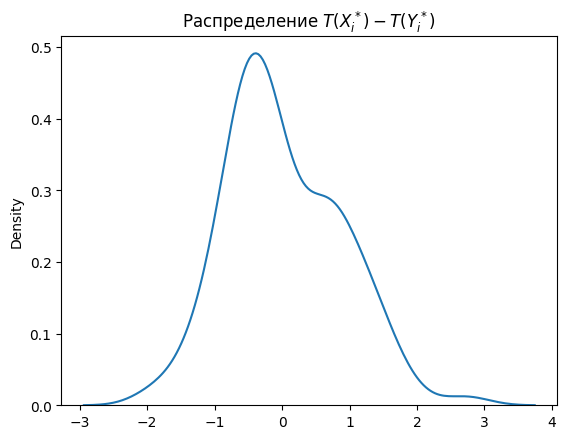

In [387]:
plot = sns.kdeplot(data=df);
plot.set_title('Распределение $T(X^*_i) - T(Y^*_i)$');
plot.get_legend().set_visible(False)

Теперь можем посмотреть где на этом графике располагается $T(X) - T(Y)$ и вычислить p-value. \
Возьмем двусторонний тест.

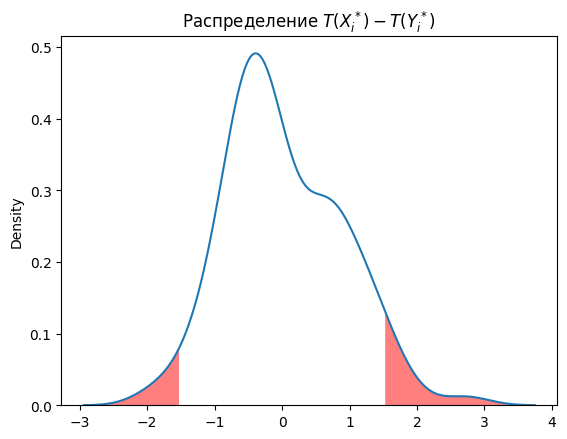

In [447]:
ax = sns.kdeplot(data=df);
ax.set_title('Распределение $T(X^*_i) - T(Y^*_i)$');
ax.get_legend().set_visible(False)

line = ax.get_lines()[-1]
x, y = line.get_data()

mask = x > T
ax.fill_between(x[mask], y1=y[mask], alpha=0.5, facecolor='red')

mask = x < -T
ax.fill_between(x[mask], y1=y[mask], alpha=0.5, facecolor='red');

In [436]:
from scipy.stats import gaussian_kde
from scipy.integrate import simpson

In [487]:
kde = gaussian_kde(df[0])

x = np.linspace(-3, 3.74, 1000)
kde_y = kde(x)

x1 = x[x > T]
y1 = kde_y[len(x[x < T]):]
area1 = np.round(simpson(y=y1, x=x1, dx=1), 3)

x0 = x[x < -T]
y0 = kde_y[:len(x0)]
area0 = np.round(simpson(y=y0, x=x0, dx=1), 3)

p_value = area0 + area1
p_value

0.091

Как видим, p-value > 0.05, поэтому нам не удалось отвергнуть нулевую гипотезу. \
Поэтому принимаем, что выборки $X$ и $Y$ идут из одного распределения.